# Part 1: What is a Probability Density Function?
To understand a PDF, let's first think about what it's trying to do. In the world of probability, we're interested in the likelihood of different outcomes.

### Discrete vs. Continuous Variables: We can split our variables into two main categories: discrete and continuous.

Discrete variables have a countable number of outcomes. Think of the result of a coin flip (heads or tails) or the number of cars passing a point in an hour (0, 1, 2, 3, ...). For discrete variables, we use a Probability Mass Function (PMF), which tells us the exact probability of each outcome. For example, the probability of rolling a 6 on a fair die is exactly 1/6.


Continuous variables, on the other hand, can take on any value within a given range. Examples include height, weight, temperature, or the time it takes for a process to complete. A person's height isn't just 5 feet or 6 feet; it could be 5.8341... feet. The number of possible values is infinite.


The Problem with Continuous Variables: This infinitude of possible values creates a problem. If we ask, "What is the probability that a person's height is exactly 5.8341239... feet?", the answer is essentially zero. Why? Because there's an infinite number of possible heights. The probability of hitting one specific, exact value is infinitesimally small.


The Solution: The Probability Density Function: This is where the PDF comes in. A PDF doesn't give us the probability of a specific value. Instead, it gives us the relative likelihood of a continuous random variable taking on a certain value. The "density" part of the name is key—it's like a measure of how "dense" the probability is around a particular point.


The Key Property: The probability of a continuous variable falling within a certain range (say, between a and b) is given by the area under the PDF curve between those two points. Mathematically, we express this using an integral:


P(a≤X≤b)=∫ 
a
b
​
 f(x)dx

where f(x) is the PDF.

### The Two Rules of a PDF: For any function to be a valid PDF, it must satisfy two conditions:

- The function must be non-negative everywhere: f(x)
ge0 for all x. This makes sense, as probability cannot be negative.

- The total area under the curve must be exactly 1: 
int_−infty 
infty
 f(x),dx=1. This means the probability of the variable taking any value is 100%.

Think of a PDF as a histogram for continuous data, but with an infinite number of infinitely thin bars. The height of the curve at any point tells you the likelihood of a value appearing in that immediate vicinity, and the total area represents all possible outcomes.

# Part 2: Why We Use PDFs in Data Science
Now that we understand what a PDF is, let's talk about its practical importance in data science. PDFs are not just theoretical constructs; they are the foundation for a wide range of powerful techniques.

- Modeling and Understanding Data Distributions: Every dataset has a distribution. By plotting a histogram of our continuous data and fitting a PDF to it, we can get a compact mathematical representation of our data's underlying structure. This allows us to summarize key properties like the mean, variance, skew, and kurtosis. For example, we might find that our data follows a Normal (Gaussian) distribution, an Exponential distribution, or a Uniform distribution.

- Statistical Inference: PDFs are the bedrock of statistical inference. When we perform hypothesis testing or build confidence intervals, we are often making assumptions about the distribution of our data. For instance, many statistical tests, like the t-test, assume that the data or sampling distribution is approximately normal. The PDF of the t-distribution or the standard normal distribution is what allows us to calculate p-values and make decisions.

- Machine Learning: PDFs are used extensively in machine learning algorithms, particularly in probabilistic models.

- Generative Models: Algorithms like Gaussian Mixture Models (GMMs) and Naive Bayes explicitly use PDFs (often Gaussian) to model the distribution of features within different classes.

- Bayesian Statistics: All of Bayesian inference is built upon Bayes' Theorem, which uses PDFs to update our beliefs about a parameter given new data. The "posterior" distribution is itself a PDF.

- Anomaly Detection: If we have a good model (a PDF) of what "normal" data looks like, we can use it to identify outliers or anomalies. Data points that fall in regions of the PDF with very low density are considered unusual. For example, in a normal distribution, values more than three standard deviations from the mean are often flagged as potential outliers.

- Risk Analysis and Simulation: PDFs are crucial for modeling uncertainty. In finance, we might model the returns of a stock using a normal distribution's PDF. We can then use this model to simulate future scenarios (Monte Carlo simulations) and estimate the probability of different outcomes, such as the likelihood of a major market downturn.

# Part 3: Python Examples
Let's see these concepts in action using Python, a staple tool for data scientists. We'll use libraries like NumPy for numerical operations, Matplotlib for plotting, and SciPy for statistical functions.

#### Example 1: Generating and Visualizing a Normal Distribution PDF

The normal distribution is the most common PDF. It's often called the "bell curve." Its PDF is defined by its mean (
mu) and standard deviation (
sigma).

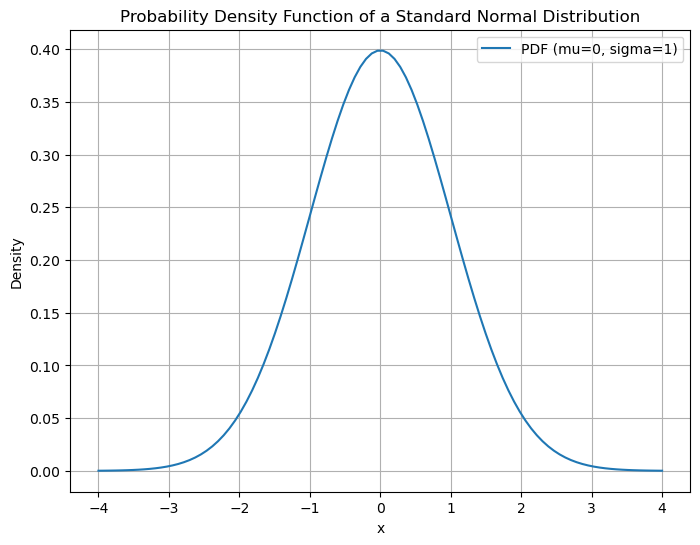

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters of our normal distribution
mu = 0  # Mean
sigma = 1 # Standard deviation

# Generate x-values for our plot
x = np.linspace(-4, 4, 100)

# Calculate the PDF values for each x
pdf_values = norm.pdf(x, loc=mu, scale=sigma)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf_values, label=f'PDF (mu={mu}, sigma={sigma})')
plt.title('Probability Density Function of a Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

#### We can use the cumulative distribution function (CDF) to find the area under the curve, which represents probability. The CDF is the integral of the PDF.

In [13]:
import numpy as np
from scipy.stats import norm

# Let's use the same standard normal distribution (mu=0, sigma=1)
mu = 0
sigma = 1

# What is the probability of a value falling between -1 and 1?
# We can find this by calculating P(X <= 1) - P(X <= -1)
prob_1 = norm.cdf(1, loc=mu, scale=sigma)
prob_neg_1 = norm.cdf(-1, loc=mu, scale=sigma)

probability_in_range = prob_1 - prob_neg_1

print(f"The probability of a value being between -1 and 1 is: {probability_in_range:.4f}")
# This should be approximately 0.6827, which is a well-known property of the normal distribution.

The probability of a value being between -1 and 1 is: 0.6827


#### Let's generate some sample data and then use a histogram to visualize its distribution. We can then overlay the corresponding PDF to see how well it fits

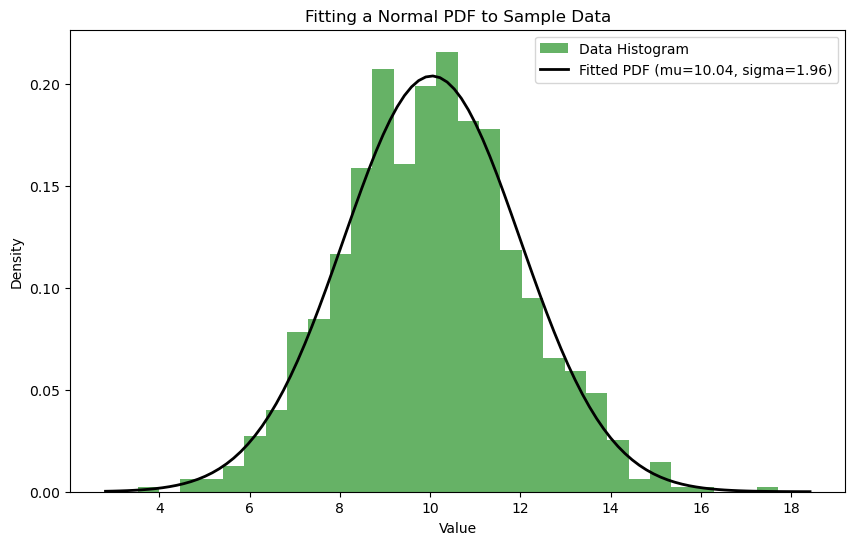

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data that is normally distributed
np.random.seed(42)
data = np.random.normal(loc=10, scale=2, size=1000)

# Plot a histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Fit a normal distribution to the data
mu, sigma = norm.fit(data)

# Generate the PDF curve for the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plot the PDF over the histogram
plt.plot(x, p, 'k', linewidth=2, label=f'Fitted PDF (mu={mu:.2f}, sigma={sigma:.2f})')
plt.title('Fitting a Normal PDF to Sample Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()